In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/segmented_customers.csv', sep=';')

df.head()
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

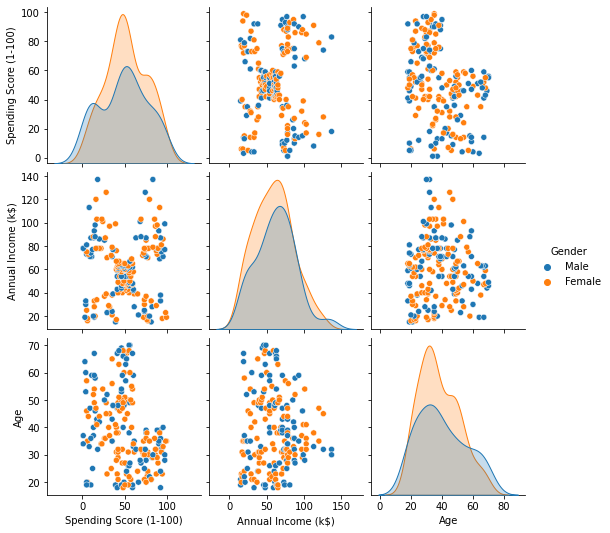

In [10]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

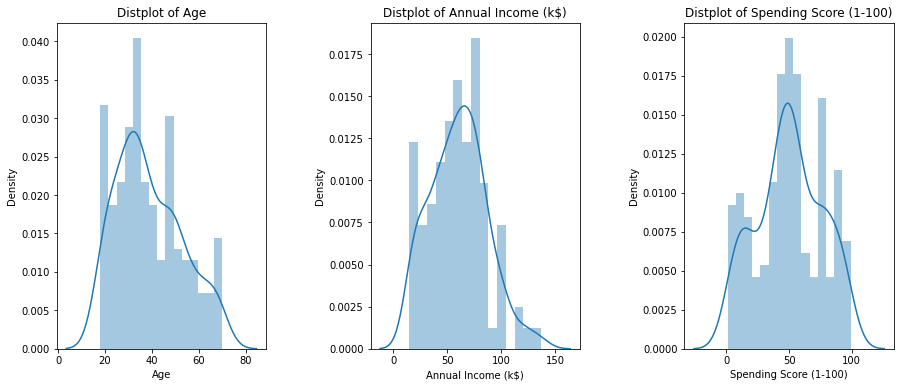

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

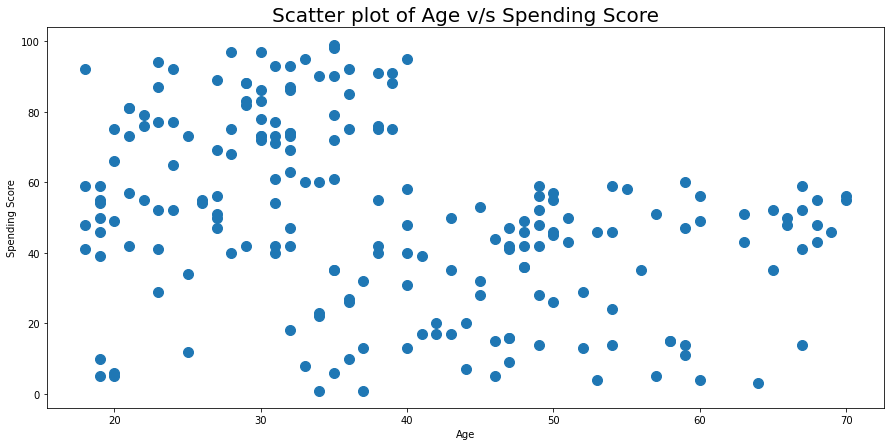

In [12]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

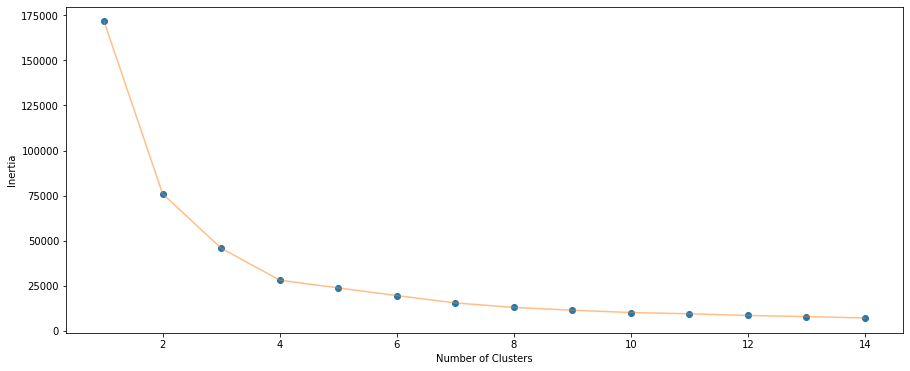

In [13]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
  algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)


plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

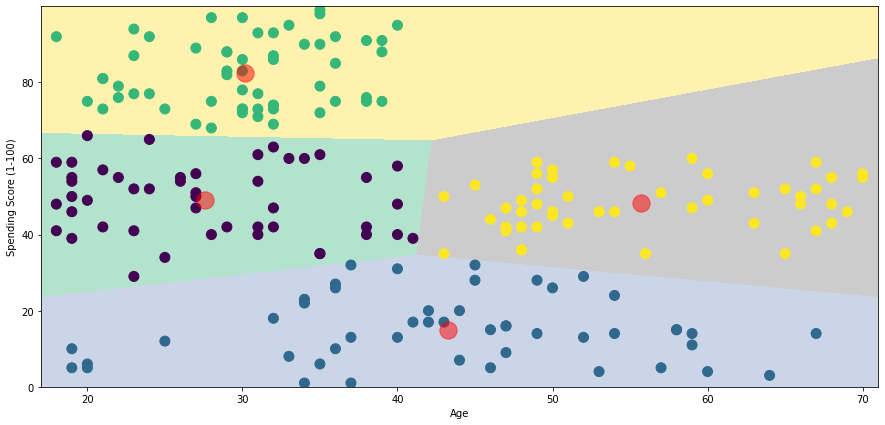

In [14]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
 tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
 extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [15]:
y_kmeans = algorithm.fit_predict(X1)
df['KMeans'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [16]:
import plotly.express as px

fig = px.scatter(df, x=df['Age'], y=df['Spending Score (1-100)'], color=df['KMeans'],
   size_max=45, log_x=True)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [17]:

import plotly.express as px
fig = px.scatter_3d(df, x=df['Age'], y=df['Spending Score (1-100)'], z=df['Annual Income (k$)'],
              color='KMeans')
fig.show()

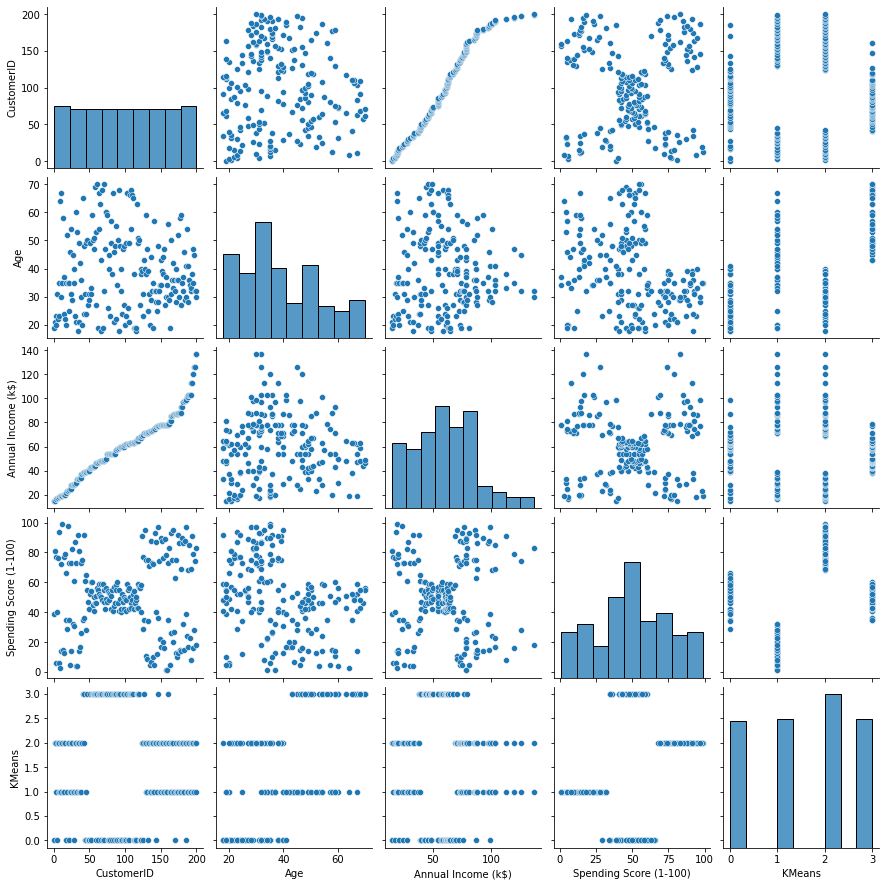

In [18]:
sns.pairplot(df)

In [19]:
x=df.iloc[:,[2,3]].values

In [20]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [21]:
model=db.fit(x)

In [22]:
label=model.labels_

In [23]:
label

array([ 0,  0,  0,  0, -1,  0,  1,  0, -1, -1, -1,  1, -1,  0,  1,  0,  1,
        0, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3, -1,  2,  2,  2,  4, -1,  2,  4, -1,  4, -1, -1, -1, -1,  4,
       -1, -1,  4, -1, -1, -1, -1, -1,  5, -1, -1,  5, -1, -1, -1,  5, -1,
        5, -1, -1, -1,  6, -1,  7,  6, -1, -1,  7,  6,  7,  6,  7,  7,  6,
        8,  7,  6,  7,  8, -1,  8,  8,  8,  7,  9,  7,  7,  7,  8,  6,  6,
        6, -1,  9,  9,  9, -1, 10,  9,  9, -1,  9, -1,  9, -1, 10, -1, 10,
       -1, 10, -1, -1, -1, 10, 10, 10, 10, 10, -1, 10, 10, 10, -1, 10, -1,
       10, -1, 10, 10, 10, 10, 10, -1, 10, -1, 10, -1, 11, -1, -1, 11, 12,
       -1, 12, 11, 11, -1, 12, -1, 12, -1, -1, -1, 13, -1, 13, -1, 13, -1,
       13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [24]:
from sklearn import metrics

# Encontrando nucleos
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

# Número de clusters
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('Numero de clusters:',n_clusters)

Numero de clusters: 14


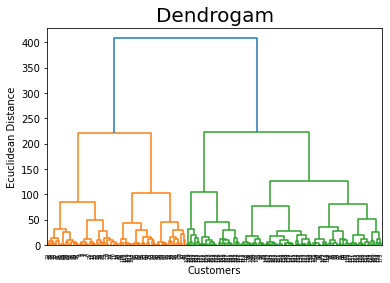

In [25]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

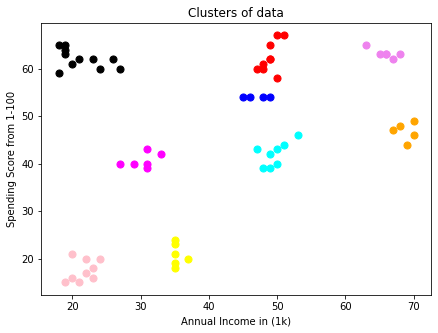

In [26]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [27]:
df['DBScan'] = db.fit_predict(x)

In [28]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans,DBScan
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,0,-1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,-1
196,197,Female,45,126,28,1,-1
197,198,Male,32,126,74,2,-1
198,199,Male,32,137,18,1,-1
